In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dataset_url = "https://raw.githubusercontent.com/apogiatzis/breast-cancer-azure-ml-notebook/master/breast-cancer-data.csv"
df = pd.read_csv(dataset_url)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

<Axes: title={'center': 'Diagnosis Distribution'}, xlabel='diagnosis'>

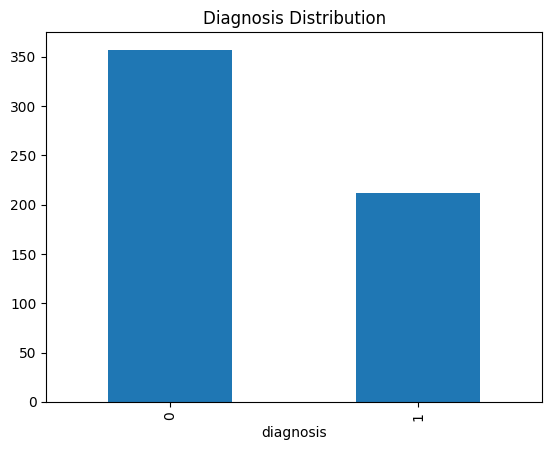

In [27]:
df.diagnosis.value_counts().plot(kind='bar', title='Diagnosis Distribution')

In [28]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [29]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean','smoothness_mean',
            'compactness_mean']
x = df[features]
y = df['diagnosis']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
len(x_train), len(x_test)

(455, 114)

Model Building

In [32]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [33]:
prediction = model.predict(x_test)

In [34]:
print("Accuracy is: ", round( accuracy_score(y_test, prediction)*100, 2), "%")

Accuracy is:  96.49 %


In [35]:
data=[[1,2,3,4,5]]
new_df = pd.DataFrame(data, columns=features)
single = model.predict(new_df)

In [36]:
single

array([0], dtype=int64)

In [37]:
proba = model.predict_proba(new_df)
proba

array([[0.888, 0.112]])

In [38]:
if single==1:
    output = "The patient has breast cancer."
    output1 = "Confidence:{} %".format(round(proba*100, 2))
else:
    output = "The patient does not have breast cancer."
    output1 = ""

In [39]:
print(output+" " + output1)

The patient does not have breast cancer. 


In [40]:
data=[[17.99, 10.38, 122.80, 0.1184, 0.2776]]
new_df = pd.DataFrame(data, columns=features)
single = model.predict(new_df)
proba = model.predict_proba(new_df)[:,1]
if single==1:
    output = "The patient has breast cancer."
    output1 = "Confidence:{} %".format(proba*100)
else:
    output = "The patient does not have breast cancer."
    output1 = ""

print(output+" " + output1)

The patient has breast cancer. Confidence:[89.8] %


In [ ]:
import joblib
MODEL_PATH = 'breast_cancer_model.pkl'
FEATURES_PATH = 'model_features.pkl'

joblib.dump(model, MODEL_PATH)
joblib.dump(features, FEATURES_PATH) # Save the list of feature names

print(f"Model saved to {MODEL_PATH}")
print(f"Features saved to {FEATURES_PATH}")


# --- Interactive Prediction Section for Notebook ---
print("\n--- Enter Patient Data for Prediction ---")
user_input_data = []
for feature_name in features:
    while True:
        try:
            value = float(input(f"Enter {feature_name.replace('_', ' ').title()}: "))
            user_input_data.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# Create a Pandas DataFrame from the user input
user_df = pd.DataFrame([user_input_data], columns=features)

# Make prediction using the loaded model
single_prediction = model.predict(user_df)[0]
# Get the probability of the positive class (Malignant, which is class 1)
proba = model.predict_proba(user_df)[:, 1][0]

# Determine the output message based on the prediction
if single_prediction == 1:
    output = "The patient has breast cancer (Malignant)."
    confidence = f"Confidence: {proba * 100:.2f}%"
else:
    output = "The patient does not have breast cancer (Benign)."
    # For benign predictions (class 0), confidence is 1 - probability of class 1
    confidence = f"Confidence: {(1 - proba) * 100:.2f}%"

print(f"\nPrediction Result: {output}")
print(confidence)

Model saved to breast_cancer_model.pkl
Features saved to model_features.pkl

--- Enter Patient Data for Prediction ---
